In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
plt.style.use("bioAI.mplstyle")
import torch
import tqdm
import scipy

import sys
sys.path.append('../')
from methods import Hexagon, HexagonalGCs, permutation_test
from models import JacobianCI, JitterCI
from plotting_functions import scatter3d, set_size, colorbar_axis
from utils import rotation_matrix

In [3]:
color_cycler = plt.rcParams['axes.prop_cycle'].by_key()['color']
savefigs = False
dpi=150

In [4]:
def train_model(model):
    # Train model
    nsamples_space = 2**8
    loss_history = []
    phases_history = [model.phases.clone().detach().numpy()]
    for epoch in tqdm.trange(1500):
        rs = model.unit_cell.sample(nsamples_space)
        rs = torch.tensor(rs,dtype=dtype)
        loss = model.train_step(rs)
        loss_history.append(loss)
    phases_history.append(model.phases.clone().detach().numpy())
    phases_history[-1] = model.unit_cell.wrap(phases_history[-1])
    loss_history = np.array(loss_history)
    trajectory_length = np.mean(model.unit_cell.geodesic(phases_history[0],phases_history[-1]))
    return loss_history, phases_history, trajectory_length

In [5]:
dtype = torch.float32
model = JacobianCI(ncells=7,dtype=dtype,lr=1e-3, shift=0, p_magnitude=0, seed=3)
loss_history, phases_history, trajectory_length = train_model(model)

100%|██████████| 1500/1500 [00:02<00:00, 695.25it/s]


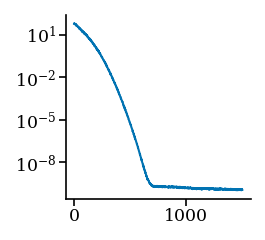

In [6]:
plt.semilogy(loss_history)    

In [60]:
mesh = model.unit_cell.mesh(10)
#mesh = model.unit_cell.sample(10)
activity = model(torch.tensor(mesh,dtype=dtype)).detach().numpy()

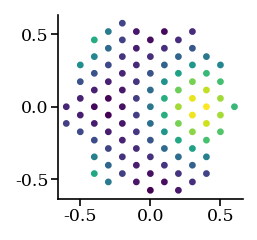

In [61]:
plt.scatter(mesh[:,0],mesh[:,1],c=activity[:,0],cmap='viridis',s=5)

In [62]:
spatial_dist = [model.unit_cell.geodesic(mesh,np.tile(mesh[i][:,None],mesh.shape[0]).T) for i in range(mesh.shape[0])]
neural_dist = np.linalg.norm(activity[None] - activity[:,None],axis=-1)

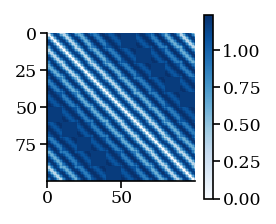

In [63]:
plt.imshow(neural_dist)
plt.colorbar()

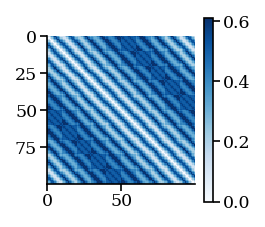

In [64]:
plt.imshow(spatial_dist)
plt.colorbar()

/var/folders/r4/nl7cgsm56mx9pch443rltrqh0000gp/T/ipykernel_1166/3166847860.py:1: RuntimeWarning: invalid value encountered in divide
  plt.imshow(neural_dist/spatial_dist)


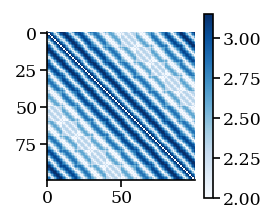

In [67]:
plt.imshow(neural_dist/spatial_dist)
plt.colorbar()

In [21]:
model.scale

Parameter containing:
tensor(10.2352, requires_grad=True)